Model Insights – Insurance Customer Churn Prediction

This notebook explains the model results.
It shows which features affect customer churn.
These insights help improve customer retention.


In [14]:
import pandas as pd
import lightgbm as lgb

# Load dataset
data = pd.read_csv("../data/Insurance_Churn_ParticipantsData/Train.csv")

# Separate features and target
X = data.drop(columns=["labels"])
y = data["labels"]

# Train model
model = lgb.LGBMClassifier(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=6,
    random_state=42
)

model.fit(X, y)


[LightGBM] [Info] Number of positive: 3967, number of negative: 29941
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003305 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 987
[LightGBM] [Info] Number of data points in the train set: 33908, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.116993 -> initscore=-2.021219
[LightGBM] [Info] Start training from score -2.021219
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

,boosting_type,'gbdt'
,num_leaves,31
,max_depth,6
,learning_rate,0.05
,n_estimators,200
,subsample_for_bin,200000
,objective,None
,class_weight,None
,min_split_gain,0.0
,min_child_weight,0.001
,min_child_samples,20


In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Get feature importance
importance = pd.DataFrame({
    "feature": X.columns,
    "importance": model.feature_importances_
}).sort_values(by="importance", ascending=False)

importance.head()


,feature,importance
14,feature_14,1060
3,feature_3,1022
2,feature_2,671
1,feature_1,657
0,feature_0,629


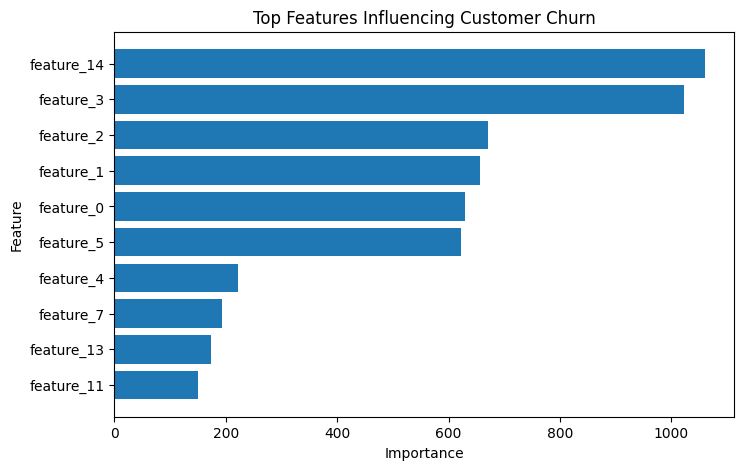

In [16]:
plt.figure(figsize=(8,5))
plt.barh(importance["feature"][:10], importance["importance"][:10])
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Top Features Influencing Customer Churn")
plt.gca().invert_yaxis()
plt.show()
